In [1]:
import pandas as pd

# Read data

In [4]:
# Python program to convert .tsv file to .csv file
# importing re library
import re
 
# reading given tsv file
with open("nhgh.tsv", 'r') as myfile:  
  with open("nhgh.csv", 'w') as csv_file:
    for line in myfile:
       
      # Replace every tab with comma
      fileContent = re.sub(",", "x", line)
      fileContent = re.sub("\t", ",", fileContent)
      
       
      # Writing into csv file
      csv_file.write(fileContent)

# output
print("Successfully made csv file")

In [3]:
data = pd.read_csv("C:/Users/User/Desktop/Data/nhgh.csv")
## After dropping rows with na there are more than enough observations
data = data.dropna()

In [22]:
## Created a column for diabetes positive 
data['diabetes'] = data['gh'].apply(lambda x : 1 if x >= 6.5 else 0)

## round off age to the nearest whole number 
data['age'] = data['age'].round(0)

data.to_csv('nhgh.csv', index=False)

# Upload data to SQLite3 database

In [2]:
import sqlite3

In [9]:
connection = sqlite3.connect('dataset.db')
c = connection.cursor()
c.execute('''CREATE TABLE data (seqn INT, sex INT, age DOUBLE, re INT, 
          income VARCHAR, tx INT, dx INT, wt DOUBLE, ht DOUBLE, bmi DOUBLE, 
          leg DOUBLE, arml DOUBLE, armc DOUBLE, waist DOUBLE, tri DOUBLE, 
          sub DOUBLE, gh DOUBLE, albumin DOUBLE, bun INT, SCr DOUBLE, diabetes DOUBLE)''')

In [4]:
df = pd.read_csv("C:/Users/User/Desktop/Data/nhgh.csv")
df.to_sql("data", connection, if_exists='replace')

5343

In [5]:
query = "SELECT * FROM data"
result_df = pd.read_sql_query(query, connection)

# Data Visualisation/ Exploration 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

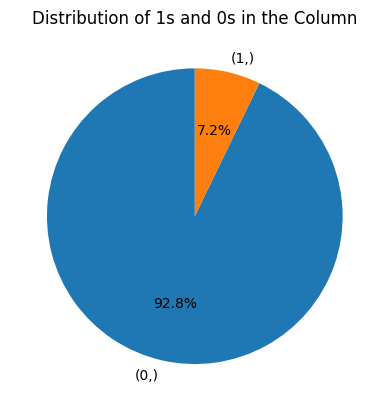

In [7]:
## Check for distribution of data for diabetes positive 
query = "SELECT diabetes FROM data"
diabetes_df = pd.read_sql_query(query, connection)
counts = diabetes_df.value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of 1s and 0s in the Column')
plt.show()

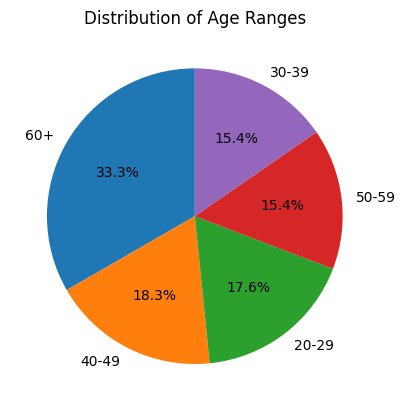

In [13]:
## Explore age range of data
query = "SELECT age FROM data"
age_df = pd.read_sql_query(query, connection)

bins = [20, 30, 40, 50, 60, 100]

# Create labels for the age ranges
labels = ['20-29', '30-39', '40-49', '50-59', '60+']

age_df['age_range'] = pd.cut(age_df['age'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age range
age_range_counts = age_df['age_range'].value_counts()

# Plotting a pie chart
plt.pie(age_range_counts, labels=age_range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Ranges')
plt.show()

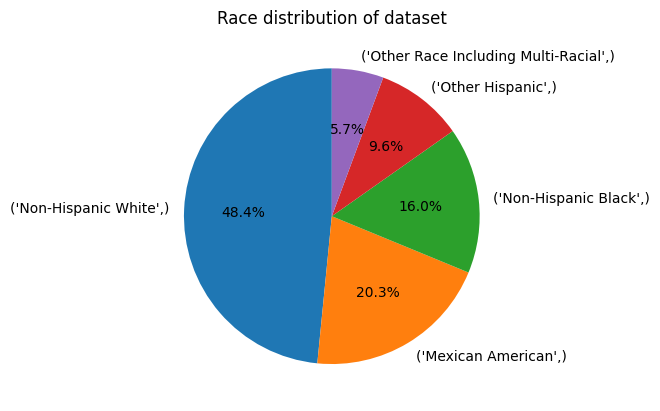

In [12]:
## Explore race distribution of dataset 
query = "SELECT re FROM data"
race_df = pd.read_sql_query(query, connection)
counts = race_df.value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Race distribution of dataset')
plt.show()

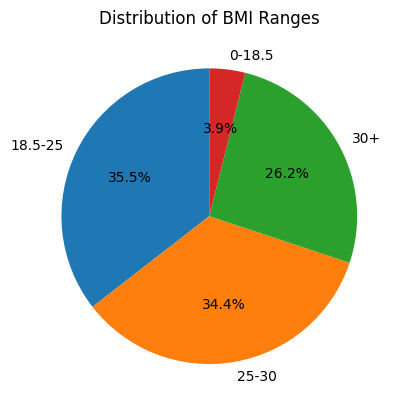

In [15]:
## Explore bmi range of data
query = "SELECT bmi FROM data"
bmi_df = pd.read_sql_query(query, connection)

bins = [0, 18.5, 25, 30, 100]

# Create labels for the bmi ranges
labels = ['0-18.5', '18.5-25', '25-30', '30+']

bmi_df['bmi_range'] = pd.cut(bmi_df['bmi'], bins=bins, labels=labels, right=False)

# Count the occurrences of each age range
bmi_range_counts = bmi_df['bmi_range'].value_counts()

# Plotting a pie chart
plt.pie(bmi_range_counts, labels=bmi_range_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of BMI Ranges')
plt.show()